In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

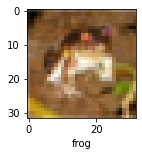

In [10]:
plot_sample(x_train,y_train,0)

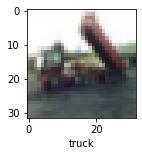

In [11]:
plot_sample(x_train,y_train,2)

In [12]:
#pixel range 0-255
#to normalize we have to divide by 255
x_test=x_test/255
x_train=x_train/255

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [14]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [15]:
cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [16]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 30ms/step - loss: 1.5111 - accuracy: 0.4572
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1648 - accuracy: 0.5894
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0372 - accuracy: 0.6375
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9642 - accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9036 - accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8515 - accuracy: 0.7032
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8110 - accuracy: 0.7157
Epoch 8/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7716 - accuracy: 0.7293
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7386 - accuracy: 0.7412
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [17]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9113 - accuracy: 0.6954


[0.9113005995750427, 0.6953999996185303]

In [18]:
y_test=y_test.reshape(-1,)

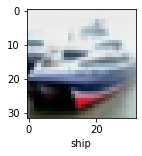

In [19]:
plot_sample(x_test,y_test,1)

In [20]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [21]:
np.argmax(y_pred[0])

3

In [22]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification report\n",classification_report(y_test,y_classes))

Classification report
               precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.63      0.55      0.58      1000
           3       0.49      0.55      0.52      1000
           4       0.64      0.64      0.64      1000
           5       0.64      0.56      0.59      1000
           6       0.74      0.80      0.77      1000
           7       0.71      0.75      0.73      1000
           8       0.74      0.83      0.78      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [26]:
import joblib

# Assuming your model is in a variable named 'model'
joblib.dump(cnn, 'model.pkl')


['model.pkl']